# Эмбеддинги

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### Загрузка данных

In [ ]:
data = pd.read_csv('lenta-ru-train.csv').iloc[:20000] #Датасет можно скачать по ссылке: https://www.kaggle.com/c/lenta-ru-ozon-2020/data
data_train, data_val = train_test_split(data, test_size=0.2, random_state=42)
print('Размерность датасета ', data_train.shape)
data_train.head()

Размерность датасета  (16000, 4)


,title,text,topic,topic_label
5894,"Фурсенко пригрозил ""Амкару"" и ""Сатурну"" отправ...",Президент Российского футбольного союза (РФС) ...,Спорт,1
3728,Палаточный городок в Иране станет достопримеча...,Власти Ирана намерены отстроить заново палаточ...,Культура,3
8958,Voyager 2 достиг границы Солнечной системы,"Станция Voyager 2, возможно, приблизилась к гр...",Наука и техника,2
7671,"""Гарри Поттер и принц-полукровка"" установил но...","Фильм ""Гарри Поттер и принц-полукровка"" устано...",Культура,3
5999,Медведев вспомнил о расстрелах в связи со срыв...,Президент России Дмитрий Медведев поручил мини...,Наука и техника,2


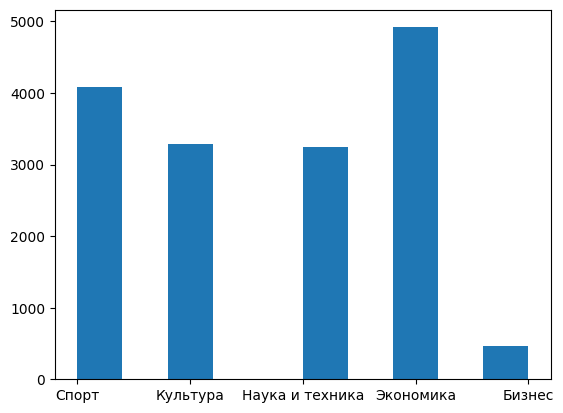

In [ ]:
plt.hist(data_train['topic'])
plt.show()

# Подготовка данных



In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('russian'))

def preprocess(text):
    text = text.lower() # приводим к нижнему регистру
    text = ''.join([word for word in text if word not in string.punctuation]) # убираем пунктуацию
    tokens = word_tokenize(text) # токенизируем
    tokens = [word for word in tokens if word not in stop_words] # убираем стоп-слова
    return ' '.join(tokens)

In [ ]:
%%time

X_train_clean = data_train['text'].apply(preprocess)
X_val_clean = data_val['text'].apply(preprocess)

CPU times: user 17.9 s, sys: 43.6 ms, total: 17.9 s
Wall time: 18.4 s


In [ ]:
y_train = data_train['topic_label'].values
y_val = data_val['topic_label'].values

# Word2Vec

In [ ]:
from gensim.models import word2vec

In [ ]:
sentences_train = [text.split() for text in X_train_clean.values]
sentences_val = [text.split() for text in X_val_clean.values]

In [ ]:
%%time
vector_size = 64
w2v_model = word2vec.Word2Vec(sentences=sentences_train, workers=4, vector_size=vector_size, min_count=5, window=5)

CPU times: user 30.8 s, sys: 168 ms, total: 31 s
Wall time: 18.7 s


In [ ]:
w2v_model.wv.get_vector("огонь")

array([ 0.26950505, -0.25419822,  0.3494626 ,  0.4701139 , -0.04383578,
       -0.4280661 ,  0.11140581,  0.01775165, -0.27912745,  0.02561706,
        0.44037896, -0.2919104 ,  0.06673238, -0.3013351 , -0.19437045,
        0.32475233, -0.55914605,  0.13231583, -0.13314474,  0.48254916,
        0.33290076,  0.64025974,  0.2625188 , -0.7710489 ,  0.00275412,
        0.43848744, -0.5899826 ,  0.16012855, -0.08585264, -0.13159366,
        0.01733724,  0.17568786, -0.45505297, -0.19424844, -0.26584587,
        0.19746217,  0.07275572, -0.16463287,  0.19800647,  0.13049482,
        0.2360345 , -0.02576072, -0.08506396, -0.27675334,  0.3527952 ,
       -0.12030348,  0.04546791, -0.25820342, -0.01154467,  0.36686632,
        0.03022603,  0.1644824 ,  0.22119296,  0.17644651,  0.24083614,
        0.0476328 ,  0.02956207, -0.2684943 , -0.10700364,  0.04360109,
        0.05693759, -0.19366817, -0.15472196, -0.01467248], dtype=float32)

In [ ]:
w2v_model.wv.most_similar(positive=["кризис"])

[('экономический', 0.9402762651443481),
 ('темпов', 0.9174087643623352),
 ('темпы', 0.9087098836898804),
 ('спад', 0.906032383441925),
 ('сектор', 0.9059188365936279),
 ('спада', 0.9005937576293945),
 ('безработицы', 0.9000025391578674),
 ('экономике', 0.8995133638381958),
 ('рецессии', 0.887963593006134),
 ('рецессия', 0.8871288895606995)]

In [ ]:
w2v_model.wv.most_similar(positive=["технологии"])

[('карты', 0.9461883902549744),
 ('системой', 0.9332745671272278),
 ('программного', 0.9297934770584106),
 ('интернета', 0.9275994896888733),
 ('материалов', 0.9231974482536316),
 ('использованием', 0.9195229411125183),
 ('различные', 0.9143840670585632),
 ('стелс', 0.9136056303977966),
 ('используется', 0.910719096660614),
 ('спутникового', 0.9097225069999695)]

In [ ]:
w2v_model.wv.similarity('спорт', 'кино')

0.26158574

In [ ]:
w2v_model.wv.similarity('теннис', 'футбол')

0.8328178

In [ ]:
w2v_model.wv.doesnt_match(['инфляция', 'теннис', 'гол','футбол'])

'инфляция'

In [ ]:
def vectorize(sentences):
    X = []
    for sentence in sentences:
        sentence_vector = []
        for word in sentence:
            try:
                vector = w2v_model.wv.get_vector(word)
                sentence_vector.append(vector)
            except KeyError:
                # если слово не встретилось при обучениии модели word2vec
                pass
        if len(sentence_vector) > 0:
            sentence_vector = np.array(sentence_vector).mean(axis=0)
        else:
            # вернем нулевой вектор для новости, у которой ни одно слово не встречалось в обучении
            sentence_vector = np.zeros(vector_size)
        X.append(sentence_vector)
    return np.array(X)

In [ ]:
W2V_train = vectorize(sentences_train)
W2V_val = vectorize(sentences_val)

In [ ]:
W2V_train[:5, :10]

array([[ 0.20229405,  0.06351421,  0.55836302,  0.78258336, -0.15656723,
        -0.58152968,  0.29833257, -0.31953928, -0.54922003, -0.15173131],
       [ 0.43352365, -0.23423316,  0.26192251,  0.11568939,  0.10114463,
        -0.66355658, -0.07582182, -0.36630791, -0.48779577,  0.14786965],
       [ 0.68578357, -0.82219028,  0.46944001, -0.09620737, -0.00515619,
        -0.93132961, -0.07454061, -0.56145269, -0.9864645 ,  0.13185929],
       [ 0.60940194, -0.3571817 ,  0.43941736, -0.55977857, -0.10026738,
        -1.38951743, -0.08669769, -0.36975628, -1.09884953,  0.55018407],
       [ 0.34276792, -0.26743945,  0.48994794,  0.03880834, -0.15272166,
        -0.74675256, -0.21422362, -0.72178334, -0.74133426, -0.25139725]])

# Визуализация эмбеддингов

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_iter=300)
tsne_results = tsne.fit_transform(W2V_train)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


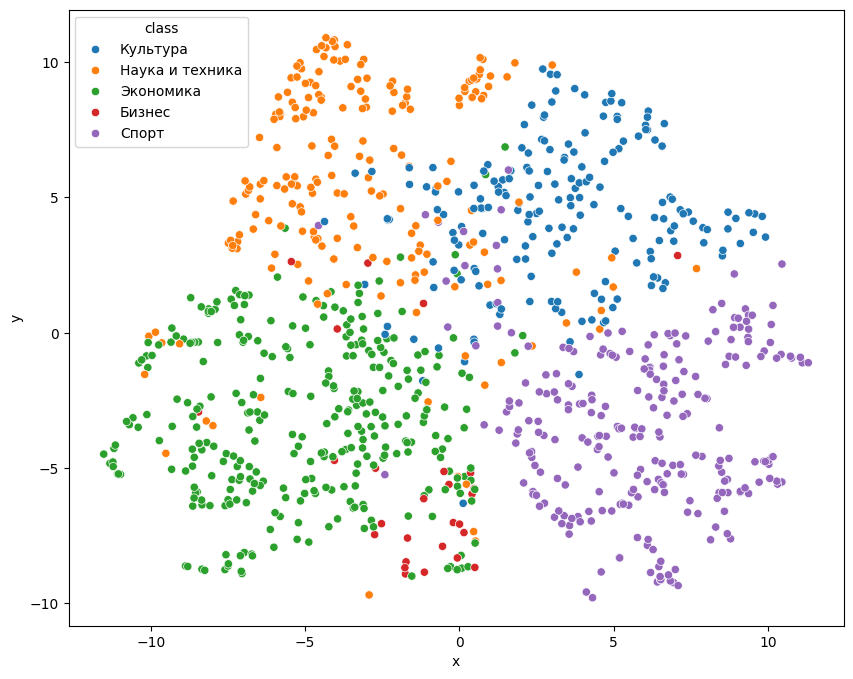

In [ ]:
data_viz = {
    'x': tsne_results[:,0],
    'y': tsne_results[:,1],
    'class': data_train['topic'].values,
}

df_viz = pd.DataFrame(data_viz)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_viz.sample(1000), x='x', y='y', hue='class')
plt.show()

# Обучим модель

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(W2V_train, y_train)

y_pred = model.predict(W2V_val)
score = accuracy_score(y_val, y_pred)

print('Доля правильных ответов Word2Vec + лог. регрессии ', round(score, 3))

Доля правильных ответов Word2Vec + лог. регрессии  0.91
